Training Perceptron for AND gate...
Testing AND gate perceptron:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


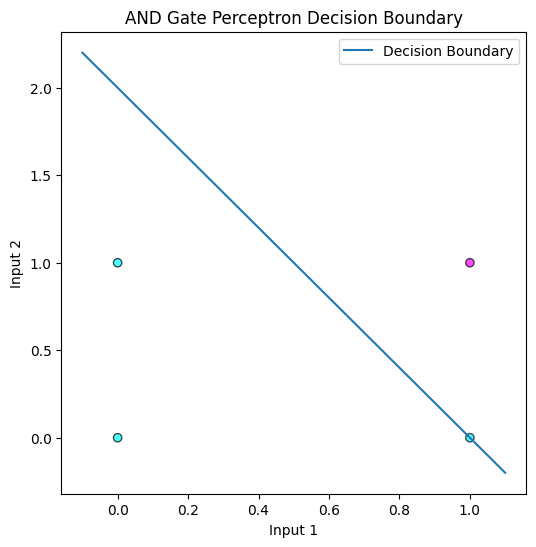


Training Perceptron for OR gate...
Testing OR gate perceptron:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


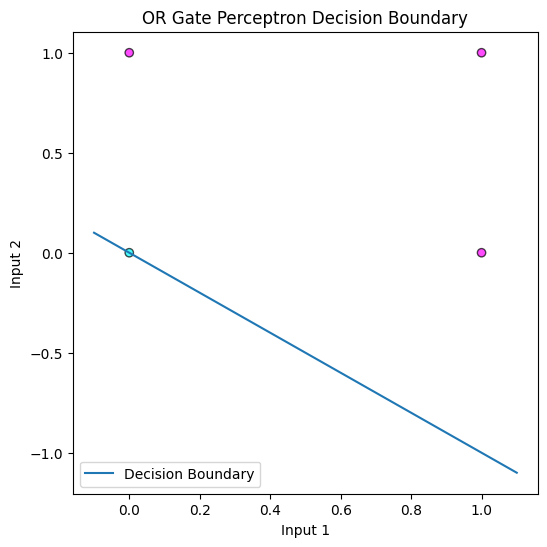

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # Including bias weight
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # Weighted sum + bias
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)  # Update bias


# Define training data for AND and OR gates
AND_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
AND_labels = np.array([0, 0, 0, 1])  # Truth table for AND gate

OR_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
OR_labels = np.array([0, 1, 1, 1])  # Truth table for OR gate

# Create and train perceptron for AND gate
print("Training Perceptron for AND gate...")
and_perceptron = Perceptron(input_size=2)
and_perceptron.train(AND_inputs, AND_labels)

# Test perceptron for AND gate
print("Testing AND gate perceptron:")
for inputs in AND_inputs:
    print(f"Input: {inputs}, Output: {and_perceptron.predict(inputs)}")

# Plot decision boundary for AND gate
plt.figure(figsize=(6, 6))
plt.scatter(AND_inputs[:, 0], AND_inputs[:, 1], c=AND_labels, cmap='cool', edgecolor='k', alpha=0.7)
x = np.linspace(-0.1, 1.1, 100)
y = - (and_perceptron.weights[1] * x + and_perceptron.weights[0]) / and_perceptron.weights[2]
plt.plot(x, y, label="Decision Boundary")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("AND Gate Perceptron Decision Boundary")
plt.legend()
plt.show()

# Create and train perceptron for OR gate
print("\nTraining Perceptron for OR gate...")
or_perceptron = Perceptron(input_size=2)
or_perceptron.train(OR_inputs, OR_labels)

# Test perceptron for OR gate
print("Testing OR gate perceptron:")
for inputs in OR_inputs:
    print(f"Input: {inputs}, Output: {or_perceptron.predict(inputs)}")

# Plot decision boundary for OR gate
plt.figure(figsize=(6, 6))
plt.scatter(OR_inputs[:, 0], OR_inputs[:, 1], c=OR_labels, cmap='cool', edgecolor='k', alpha=0.7)
x = np.linspace(-0.1, 1.1, 100)
y = - (or_perceptron.weights[1] * x + or_perceptron.weights[0]) / or_perceptron.weights[2]
plt.plot(x, y, label="Decision Boundary")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("OR Gate Perceptron Decision Boundary")
plt.legend()
plt.show()


1B. Implement a perceptron for binary classification using breast cancer dataset.

Perceptron Accuracy on Test Data: 97.37%


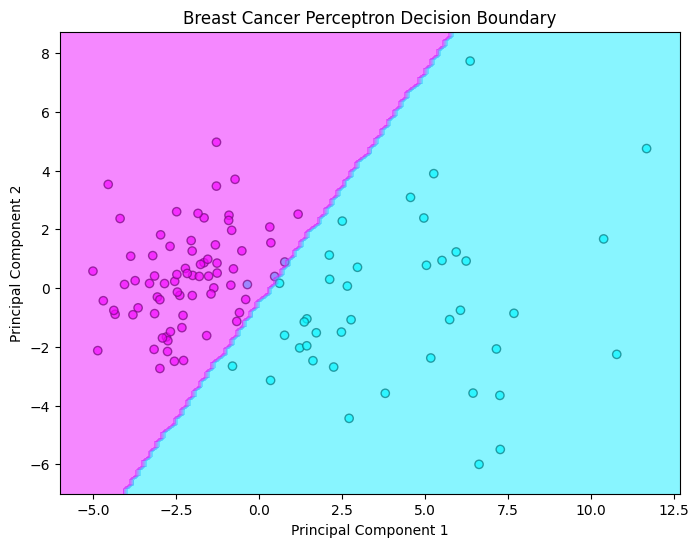

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and labels

# Preprocess the data
scaler = StandardScaler()  # Standardize features
X = scaler.fit_transform(X)

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        self.weights = np.zeros(input_size + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# Train the perceptron
perceptron = Perceptron(input_size=X_train.shape[1], learning_rate=0.01, epochs=100)
perceptron.train(X_train, y_train)

# Test the perceptron
predictions = np.array([perceptron.predict(x) for x in X_test])
accuracy = np.mean(predictions == y_test) * 100

print(f"Perceptron Accuracy on Test Data: {accuracy:.2f}%")

# Visualization of decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='cool', edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Breast Cancer Perceptron Decision Boundary")

# Plot decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = np.array([perceptron.predict(np.array([xx.ravel()[i], yy.ravel()[i]])) for i in range(xx.ravel().shape[0])])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap='cool')
plt.show()


Implement single layer perceptron for and & or gates

Training Perceptron for AND gate...
Testing AND gate perceptron:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


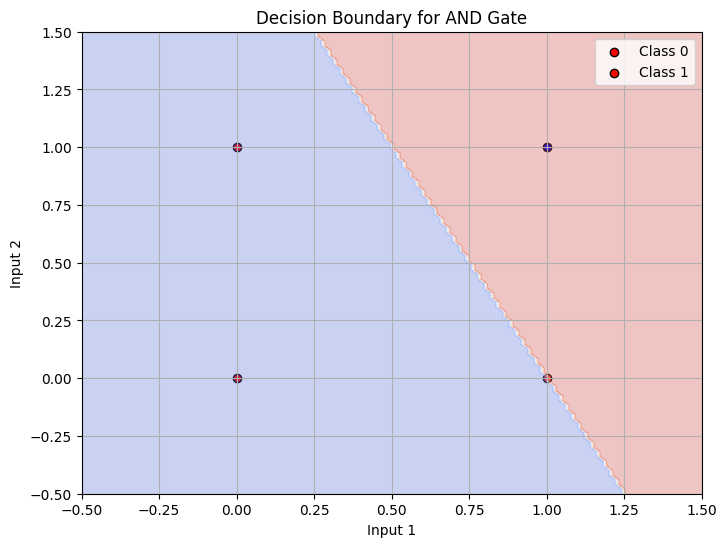


Training Perceptron for OR gate...
Testing OR gate perceptron:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


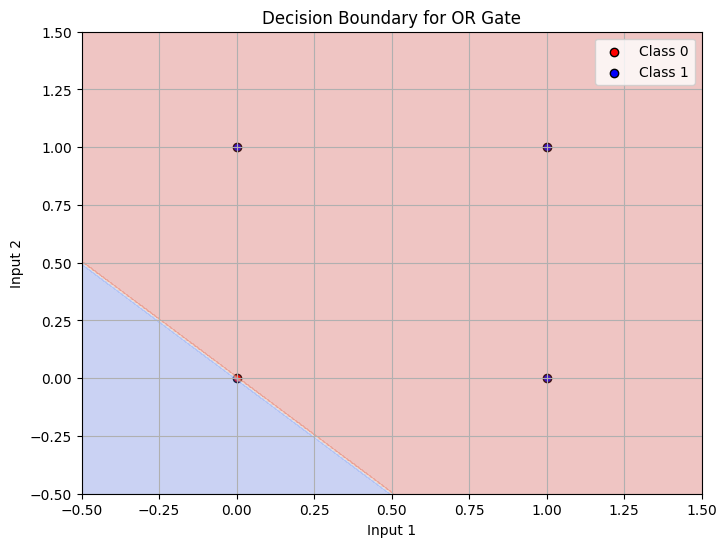

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        # Compute weighted sum (dot product + bias)
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                # Update weights and bias
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

def plot_decision_boundary(perceptron, inputs, labels, title):
    # Plot the data points
    plt.figure(figsize=(8, 6))
    for input, label in zip(inputs, labels):
        color = 'red' if label == 0 else 'blue'
        plt.scatter(input[0], input[1], color=color, edgecolor='k', label=f"Class {label}" if label == 0 else None)

    # Plot the decision boundary
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([perceptron.predict(point) for point in grid_points])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.title(title)
    plt.legend(["Class 0", "Class 1"])
    plt.grid(True)
    plt.show()

# Define training data for AND gate
AND_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
AND_labels = np.array([0, 0, 0, 1])  # Truth table for AND

# Define training data for OR gate
OR_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
OR_labels = np.array([0, 1, 1, 1])  # Truth table for OR

# Training perceptron for AND gate
print("Training Perceptron for AND gate...")
and_perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
and_perceptron.train(AND_inputs, AND_labels)

# Testing perceptron for AND gate
print("Testing AND gate perceptron:")
for inputs in AND_inputs:
    print(f"Input: {inputs}, Output: {and_perceptron.predict(inputs)}")

# Plot decision boundary for AND gate
plot_decision_boundary(and_perceptron, AND_inputs, AND_labels, title="Decision Boundary for AND Gate")

# Training perceptron for OR gate
print("\nTraining Perceptron for OR gate...")
or_perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
or_perceptron.train(OR_inputs, OR_labels)

# Testing perceptron for OR gate
print("Testing OR gate perceptron:")
for inputs in OR_inputs:
    print(f"Input: {inputs}, Output: {or_perceptron.predict(inputs)}")

# Plot decision boundary for OR gate
plot_decision_boundary(or_perceptron, OR_inputs, OR_labels, title="Decision Boundary for OR Gate")


Perceptron Accuracy on Breast Cancer Dataset: 99.12%


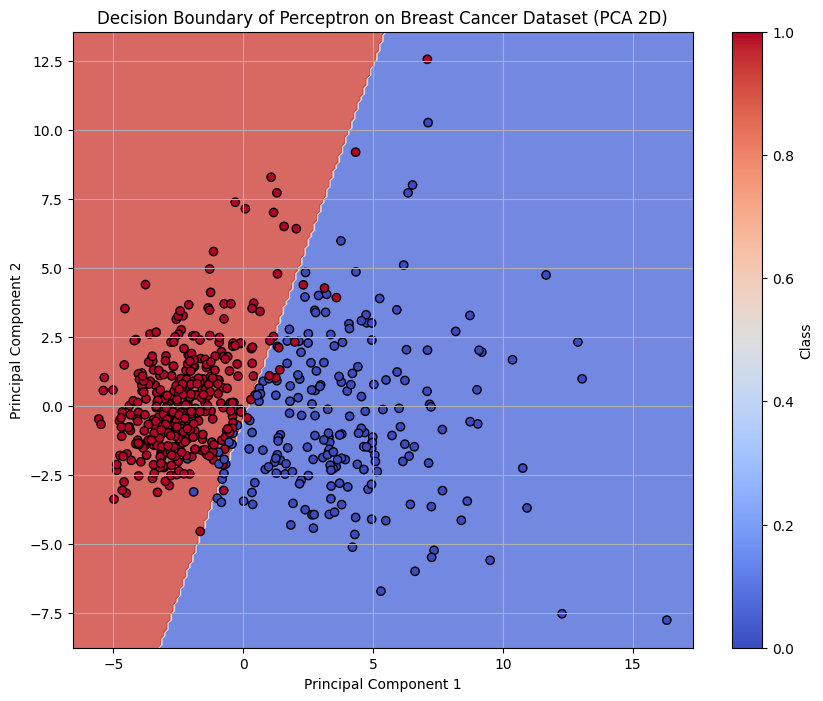

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define the perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        self.weights = np.zeros(input_size + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and target labels

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2D, y, test_size=0.2, random_state=42)

# Train the perceptron
perceptron = Perceptron(input_size=X_train.shape[1], learning_rate=0.01, epochs=1000)
perceptron.train(X_train, y_train)

# Evaluate on test data
predictions = np.array([perceptron.predict(x) for x in X_test])
accuracy = np.mean(predictions == y_test) * 100

print(f"Perceptron Accuracy on Breast Cancer Dataset: {accuracy:.2f}%")

# Visualization of decision boundary
def plot_decision_boundary(perceptron, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    Z = np.array([perceptron.predict([xx.ravel()[i], yy.ravel()[i]]) for i in range(xx.ravel().shape[0])])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title("Decision Boundary of Perceptron on Breast Cancer Dataset (PCA 2D)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Class")
    plt.grid(True)
    plt.show()

# Plot decision boundary
plot_decision_boundary(perceptron, X_2D, y)


Training Perceptron for class 0 (One-vs-Rest)...
Training Perceptron for class 1 (One-vs-Rest)...
Training Perceptron for class 2 (One-vs-Rest)...
Training Perceptron for class 3 (One-vs-Rest)...

Testing Perceptrons on Multi-Class Data...
Perceptron Accuracy on Multi-Class Data: 99.12%


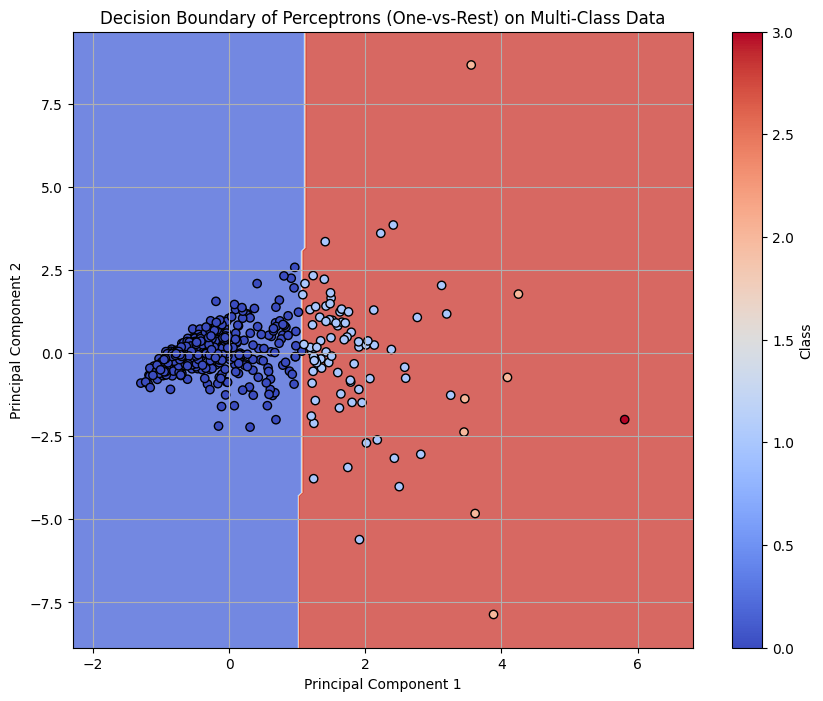

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define the perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        self.weights = np.zeros(input_size + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# Load and preprocess the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Reduce dimensionality for better visualization and clustering
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# Artificially create three clusters (multi-class) based on PCA components
y_multiclass = np.digitize(X[:, 0], bins=np.linspace(X[:, 0].min(), X[:, 0].max(), 4)) - 1

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)

# Train one perceptron per class (One-vs-Rest)
unique_classes = np.unique(y_train)
perceptrons = {}
for cls in unique_classes:
    print(f"Training Perceptron for class {cls} (One-vs-Rest)...")
    binary_labels = (y_train == cls).astype(int)
    perceptron = Perceptron(input_size=X_train.shape[1], learning_rate=0.01, epochs=1000)
    perceptron.train(X_train, binary_labels)
    perceptrons[cls] = perceptron

# Test the perceptrons
print("\nTesting Perceptrons on Multi-Class Data...")
predictions = []
for sample in X_test:
    class_scores = {cls: perceptrons[cls].predict(sample) for cls in unique_classes}
    predicted_class = max(class_scores, key=class_scores.get)  # Choose class with the highest score
    predictions.append(predicted_class)

predictions = np.array(predictions)
accuracy = np.mean(predictions == y_test) * 100
print(f"Perceptron Accuracy on Multi-Class Data: {accuracy:.2f}%")

# Visualization of decision boundary
def plot_decision_boundary(X, y, perceptrons, unique_classes):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    Z = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            class_scores = {cls: perceptrons[cls].predict([xx[i, j], yy[i, j]]) for cls in unique_classes}
            predicted_class = max(class_scores, key=class_scores.get)
            Z[i, j] = predicted_class

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', marker='o')
    plt.title("Decision Boundary of Perceptrons (One-vs-Rest) on Multi-Class Data")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(scatter, label="Class")
    plt.grid(True)
    plt.show()

# Plot decision boundary
plot_decision_boundary(X, y_multiclass, perceptrons, unique_classes)


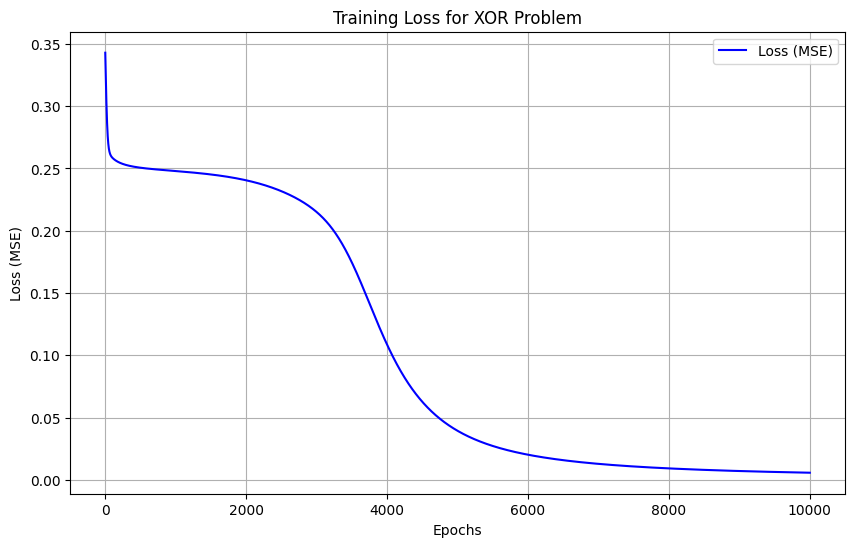

MLP XOR Output:
Input: [0 0], Predicted Output: 0.0789
Input: [0 1], Predicted Output: 0.9305
Input: [1 0], Predicted Output: 0.9305
Input: [1 1], Predicted Output: 0.0823


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.random.randn(hidden_size)
        self.bias_output = np.random.randn(output_size)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)
        return self.output

    def backpropagate(self, X, y):
        # Compute gradients
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def train(self, X, y):
        loss_history = []
        for epoch in range(self.epochs):
            self.forward(X)
            self.backpropagate(X, y)
            loss = np.mean(np.square(y - self.output))  # Mean Squared Error loss
            loss_history.append(loss)
        return loss_history

# XOR gate problem
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

mlp = MLP(input_size=2, hidden_size=2, output_size=1)
loss_history = mlp.train(X, y)

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Loss (MSE)', color='blue')
plt.title("Training Loss for XOR Problem")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

# Test the MLP on XOR
print("MLP XOR Output:")
for input_data in X:
    print(f"Input: {input_data}, Predicted Output: {mlp.forward(input_data)[0]:.4f}")


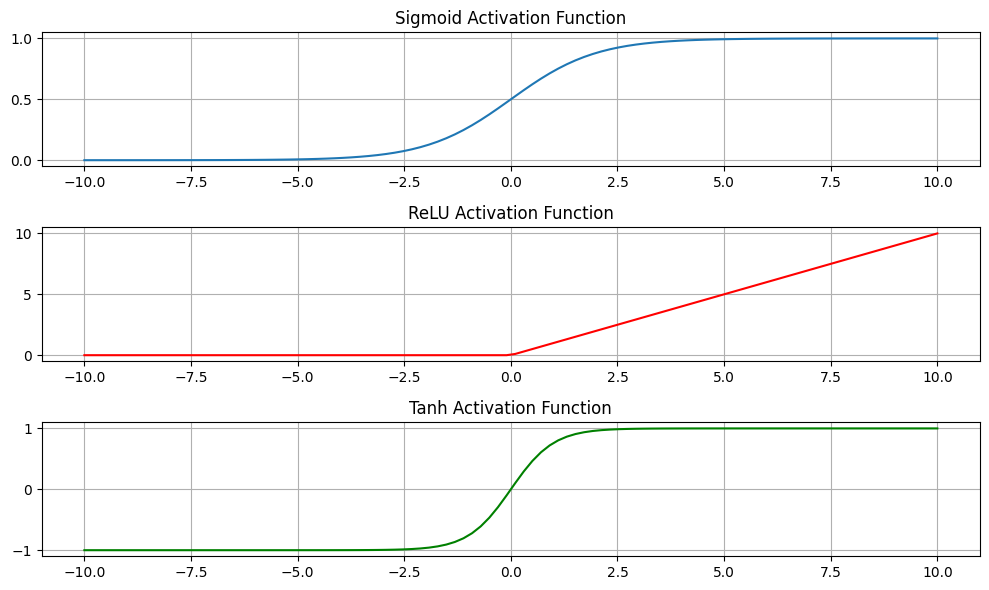

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid, ReLU, and Tanh activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Generate input data
x = np.linspace(-10, 10, 100)

# Apply the activation functions
sigmoid_output = sigmoid(x)
relu_output = relu(x)
tanh_output = tanh(x)

# Plotting the activation functions
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(x, sigmoid_output, label="Sigmoid")
plt.title("Sigmoid Activation Function")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(x, relu_output, label="ReLU", color='r')
plt.title("ReLU Activation Function")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(x, tanh_output, label="Tanh", color='g')
plt.title("Tanh Activation Function")
plt.grid(True)

plt.tight_layout()
plt.show()


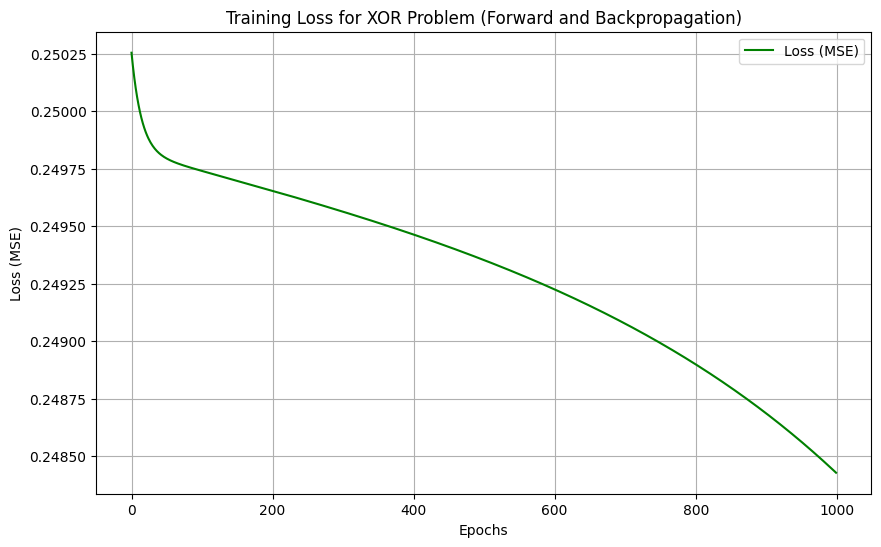

Input: [0 0], Predicted Output: 0.5105
Input: [0 1], Predicted Output: 0.5239
Input: [1 0], Predicted Output: 0.4803
Input: [1 1], Predicted Output: 0.4861


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural network with one hidden layer
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.random.randn(hidden_size)
        self.bias_output = np.random.randn(output_size)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)
        return self.output

    def backward(self, X, y):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def train(self, X, y, epochs=1000):
        loss_history = []
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            loss = np.mean(np.square(y - self.output))  # Mean Squared Error loss
            loss_history.append(loss)
        return loss_history

# XOR problem
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)
loss_history = nn.train(X, y)

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Loss (MSE)', color='green')
plt.title("Training Loss for XOR Problem (Forward and Backpropagation)")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

# Test the trained neural network
for input_data in X:
    print(f"Input: {input_data}, Predicted Output: {nn.forward(input_data)[0]:.4f}")
